In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype,is_numeric_dtype
from sklearn.utils import resample

In [138]:
# import glob
# # Get a list of all CSV files in a directory
# csv_files = glob.glob('/Users/dorcas/Desktop/Standard_bank_hackathon/telematics_data/*.csv')

# # Create an empty dataframe to store the combined data
# combined_data = pd.DataFrame()

# # Loop through each CSV file and append its contents to the combined dataframe
# combined_data = pd.concat(pd.read_csv(f) for f in csv_files)

In [191]:
# total_data = combined_data
# total_data.to_csv('/Users/dorcas/Desktop/Standard_bank_hackathon/telematics_data/total_data.csv')
combined_data = pd.read_csv('total_data.csv')

In [192]:
# Preprocessing
def selection(data):    
    variables = ['id','coordinate_latitude','coordinate_longitude','z_accel','odometer','speed','vext',
             'linear_g','road_speed','vgsm','altitude','MP_NAME']
    data = data[variables]
    data = data.dropna(axis = 0)
    data = data.reset_index(drop=True)
    return data

In [193]:
data1 = selection(combined_data)
data1.shape

(4085059, 12)

In [194]:
# Number of towns visited by each vehicle 
vehicle_id = data1['id'].unique()
def town_visited(data,town_var):
    num_towns = []
    num = (len(data.loc[data['id']==i,town_var].unique()) for i in vehicle_id) 
    num_towns+=num
    return num_towns    

In [195]:
num_towns = town_visited(data1,'MP_NAME')
total_num_towns = pd.DataFrame({'Vehicle id':vehicle_id,
            'Number of towns':num_towns})#.sort_values(by = ['Number of towns'],ascending=False)

In [196]:
total_num_towns

,Vehicle id,Number of towns
0,126619021,20
1,176493415,58
2,140674559,43
3,160148106,33
4,167540522,28
...,...,...
100,156925814,38
101,140822679,28
102,159451579,37
103,140415270,45


In [160]:
#number of cars driven past a certain number of towns 
place_num = len(total_num_towns[total_num_towns['Number of towns']>100])
total_number = len(total_num_towns['Number of towns'])
per = place_num/total_number
per

0.12380952380952381

In [197]:
# Total distance travelled by each vehicle
vehicle_id = data1['id'].unique()
def longest_dist(data,odometer_var):
    longest = []
    num = (max(data.loc[data['id']==i,odometer_var]) for i in vehicle_id)
    longest+=num
    return longest    

In [198]:
longest = longest_dist(data1,'odometer')
total_distance = pd.DataFrame({'Vehicle id':vehicle_id,
            'Total distance':longest})#.sort_values(by = ['Total distance'],ascending=False)

In [199]:
total_distance

,Vehicle id,Total distance
0,126619021,616903590.0
1,176493415,144327410.0
2,140674559,187647278.0
3,160148106,171143372.0
4,167540522,92639718.0
...,...,...
100,156925814,132358487.0
101,140822679,165458187.0
102,159451579,219934226.0
103,140415270,239465131.0


In [164]:
#Total distance travelled by the car
place_num = len(total_distance[total_distance['Total distance']>500000000])
total_number = len(total_distance['Total distance'])
per = place_num/total_number
per

0.05714285714285714

In [200]:
#Distance travelled by the vehicles in the 3-months period
vehicle_id = data1['id'].unique()
def interval_dist(data,odometer_var):
    interval = []
    num = (max(data.loc[data['id']==i,odometer_var])- min(data.loc[data['id']==i,odometer_var]) for i in vehicle_id)
    interval+=num
    return interval    

In [201]:
interval = interval_dist(data1,'odometer')
total_interval_distance = pd.DataFrame({'Vehicle id':vehicle_id,
            '3 months distance':interval})#.sort_values(by = ['3 months distance'],ascending=False)

In [202]:
total_interval_distance

,Vehicle id,3 months distance
0,126619021,6803455.0
1,176493415,25116438.0
2,140674559,4132825.0
3,160148106,28713463.0
4,167540522,11930625.0
...,...,...
100,156925814,14443485.0
101,140822679,13353461.0
102,159451579,20634616.0
103,140415270,24523650.0


In [168]:
#Total distance travelled by the car within 3 months
place_num = len(total_interval_distance[total_interval_distance['3 months distance']>35000000])
total_number = len(total_interval_distance['3 months distance'])
per = place_num/total_number
per

0.0380952380952381

In [203]:
# Speeding(>130km/hr) 
vehicle_id = data1['id'].unique()
def speeding(data,speed_var):
    num_speed = []
    num = (sum(data.loc[data['id']==i,speed_var]>130) for i in vehicle_id)
    num_speed+=num
    return num_speed    

In [204]:
num_speed = speeding(data1,'speed')
total_num_speed = pd.DataFrame({'Vehicle id':vehicle_id,
            'Number of speeding':num_speed})#.sort_values(by = ['Number of speeding'],ascending=False)
total_num_speed

,Vehicle id,Number of speeding
0,126619021,0
1,176493415,4
2,140674559,0
3,160148106,1
4,167540522,0
...,...,...
100,156925814,0
101,140822679,0
102,159451579,0
103,140415270,0


In [205]:
# maximum speed 
vehicle_id = data1['id'].unique()
def speeding(data,speed_var):
    max_speed = []
    num = (max(data.loc[data['id']==i,speed_var]) for i in vehicle_id)
    max_speed+=num
    return max_speed    

In [206]:
max_speed = speeding(data1,'speed')
max_speeding = pd.DataFrame({'Vehicle id':vehicle_id,
            'Max speeding':max_speed})#.sort_values(by = ['Number of speeding'],ascending=False)
max_speeding

,Vehicle id,Max speeding
0,126619021,105
1,176493415,133
2,140674559,113
3,160148106,131
4,167540522,103
...,...,...
100,156925814,119
101,140822679,103
102,159451579,104
103,140415270,116


In [207]:
claims = pd.read_csv('claims_data.csv')
claims = claims.fillna(0)
claims

,Vehicle id,number of claims,total claims cost
0,92624443,6,389723.07
1,87055861,3,209466.98
2,111082600,3,76122.98
3,96215479,2,56622.41
4,104804470,2,206623.44
...,...,...,...
104,212597073,0,0.00
105,219532871,0,0.00
106,247281483,0,0.00
107,251871348,0,0.00


In [208]:
#Forming target variable class on the claim dataset
def target_col(data):
    def target_var(d,total_claim):
        if (total_claim >= 0) & (total_claim <= 10000):        
            return 0                
        elif (total_claim > 10000) & (total_claim <= 99000):                
            return 1
        else:                
            return 2
    target = data.apply(lambda d: target_var(d,d['total claims cost']),axis = 1)
    return target

In [209]:
claims['Target'] = target_col(claims)

In [210]:
claims 

,Vehicle id,number of claims,total claims cost,Target
0,92624443,6,389723.07,2
1,87055861,3,209466.98,2
2,111082600,3,76122.98,1
3,96215479,2,56622.41,1
4,104804470,2,206623.44,2
...,...,...,...,...
104,212597073,0,0.00,0
105,219532871,0,0.00,0
106,247281483,0,0.00,0
107,251871348,0,0.00,0


In [211]:
# Highest altitude by each vehicle
vehicle_id = data1['id'].unique()
def altitude(data,altitude_var):
    highest = []
    num = (max(data.loc[data['id']==i,altitude_var]) for i in vehicle_id)
    highest+=num
    return highest    

In [212]:
highest_alt = altitude(data1,'altitude')
highest_altitiude = pd.DataFrame({'Vehicle id':vehicle_id,
            'Highest Altitude':highest_alt})#.sort_values(by = ['Total distance'],ascending=False)

In [213]:
highest_altitiude

,Vehicle id,Highest Altitude
0,126619021,137.0
1,176493415,446.0
2,140674559,1061.0
3,160148106,420.0
4,167540522,204.0
...,...,...
100,156925814,452.0
101,140822679,314.0
102,159451579,451.0
103,140415270,453.0


In [214]:
#merge new colums of interest
col = [total_num_towns, total_distance, total_interval_distance,total_num_speed, max_speeding,highest_altitiude]
new_data = claims
for i in col:
    new_data = pd.merge(new_data, i, on='Vehicle id')
new_data

,Vehicle id,number of claims,total claims cost,Target,Number of towns,Total distance,3 months distance,Number of speeding,Max speeding,Highest Altitude
0,92624443,6,389723.07,2,39,198972568.0,30178138.0,207,147,308.0
1,87055861,3,209466.98,2,23,464985054.0,17063598.0,2,135,194.0
2,111082600,3,76122.98,1,17,250836262.0,11501874.0,0,104,423.0
3,96215479,2,56622.41,1,47,538175514.0,15390897.0,0,127,3162.0
4,104804470,2,206623.44,2,29,406227506.0,18547477.0,19,143,262.0
...,...,...,...,...,...,...,...,...,...,...
100,209828568,0,0.00,0,20,355491593.0,11387240.0,0,103,145.0
101,212597073,0,0.00,0,19,54070855.0,15874935.0,0,129,598.0
102,219532871,0,0.00,0,7,362608883.0,1999390.0,0,101,335.0
103,247281483,0,0.00,0,202,8261404.0,8260019.0,1,133,1761.0


In [215]:
#variables to use
# variables = ['id','coordinate_latitude','coordinate_longitude','z_accel','odometer','speed','vext',
#              'linear_g','road_speed','vgsm','altitude']
# data_new = data[variables]
# data_new

In [185]:
new_data[new_data['Vehicle id'] == 111082600]

,Vehicle id,number of claims,total claims cost,Target,Number of towns,Total distance,3 months distance,Number of speeding,Max speeding
2,111082600,3,76122.98,1,17,250836262.0,11501874.0,0,104


In [216]:
missing = new_data.isnull().sum() #missing values
total = new_data.isnull().count() #total number
ptg = round(missing/total *100,2)
d = pd.DataFrame({"count" : missing, "percentage" : ptg})
d

,count,percentage
Vehicle id,0,0.0
number of claims,0,0.0
total claims cost,0,0.0
Target,0,0.0
Number of towns,0,0.0
Total distance,0,0.0
3 months distance,0,0.0
Number of speeding,0,0.0
Max speeding,0,0.0
Highest Altitude,0,0.0


In [217]:
new_data['Target'].value_counts()

Target
0    82
1    12
2    11
Name: count, dtype: int64

In [256]:
def drop(data,var_drop):
    data = data.drop(var_drop,axis = 1)
    return data

In [298]:
new_data_ = drop(new_data,['total claims cost','Vehicle id'])
new_data_ 

,number of claims,Target,Number of towns,Total distance,3 months distance,Number of speeding,Max speeding,Highest Altitude
0,6,2,39,198972568.0,30178138.0,207,147,308.0
1,3,2,23,464985054.0,17063598.0,2,135,194.0
2,3,1,17,250836262.0,11501874.0,0,104,423.0
3,2,1,47,538175514.0,15390897.0,0,127,3162.0
4,2,2,29,406227506.0,18547477.0,19,143,262.0
...,...,...,...,...,...,...,...,...
100,0,0,20,355491593.0,11387240.0,0,103,145.0
101,0,0,19,54070855.0,15874935.0,0,129,598.0
102,0,0,7,362608883.0,1999390.0,0,101,335.0
103,0,0,202,8261404.0,8260019.0,1,133,1761.0


In [232]:
# def sample(data,var_drop,target):
#     X,y = data.drop(var_drop,axis = 1), data[target]
#     cols = X.columns.tolist()
#     from sklearn.preprocessing import StandardScaler  #RobustScaler
#     X = StandardScaler().fit_transform(X)
#     X = pd.DataFrame(X, columns=cols)
#     return X,y
#new_data1 = new_data.drop(['total claims cost'],axis=1)

In [233]:
#X,y = sample(new_data,['total claims cost','Target','Vehicle id'],'Target')

## I'm here 

In [299]:
# Number of target claims
#def test(data,target):
    
data_no = new_data_[new_data_['Target'] == 0]
data_med = new_data_[new_data_['Target'] == 1]
data_high = new_data_[new_data_['Target'] == 2]
print('Number of low claims are',len(data_no),'medium claims are',len(data_med),'and high claims are',len(data_high))

Number of low claims are 82 medium claims are 12 and high claims are 11


In [300]:
# Extracting target samples for the test dataset
data_no1 = data_no.iloc[range(15),:]
data_med1 = data_med.iloc[range(5),:]
data_high1 = data_high.iloc[range(5),:]

In [301]:
#Reset index 
# dset = [data_no,data_med,data_high]
# for i in dset:
#     i = i.reset_index(drop=True) 
data_no = data_no.reset_index(drop=True)    
data_med = data_med.reset_index(drop=True)
data_high = data_high.reset_index(drop=True)

In [302]:
# Removing the test data from the main data for training
data_no.drop(labels=range(0, 15),inplace = True)
data_med.drop(labels=range(0, 5),inplace = True)
data_high.drop(labels=range(0, 5),inplace = True)

In [303]:
#select a sample from no claim to complement the smaller samples of other claims
data_no2 = data_no.sample(n=30) #270,360,450,540
data_no2.shape

(30, 8)

In [304]:
#Putting the data in to training and testing
Data_tr = pd.concat([data_no2,data_med,data_high])
Data_te = pd.concat([data_no1,data_med1,data_high1])

In [305]:
Data_tr.shape,Data_te.shape

((43, 8), (25, 8))

In [306]:
# split into train and test data
X_train, y_train = Data_tr.drop(['Target'],axis=1),Data_tr['Target']
X_test, y_test = Data_te.drop(['Target'],axis=1),Data_te['Target']
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape) 

(43, 7) (43,) (25, 7) (25,)


In [307]:
# split into train and test data
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [308]:
y_test.value_counts()

Target
0    15
1     5
2     5
Name: count, dtype: int64

In [311]:
def scale(dtrain,dtest):
    cols = dtrain.columns.tolist()
    from sklearn.preprocessing import StandardScaler  #RobustScaler
    dtrain,dtest = StandardScaler().fit_transform(dtrain),StandardScaler().fit_transform(dtest)
    dtrain,dtest = pd.DataFrame(dtrain, columns=cols),pd.DataFrame(dtest, columns=cols)
    return dtrain,dtest

In [312]:
X_train,X_test = scale(X_train,X_test)

In [316]:
def train_model(model, grid_params, X, y, verbose=0): 
    #data_ = scale_data(data)
    #scores = ['f1','roc_auc','recall']
    gs = GridSearchCV(model,grid_params, cv = 2, scoring = 'f1',verbose=verbose)
    #X,y = data_.drop(target_var,axis = 1),data_[target_var] 
    gs.fit(X, y)
    #model = gs.best_estimator_
    return gs  #cv_results_
       

In [318]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, classification_report

In [319]:
models_para = [{'criterion':('gini', 'entropy'), 'min_samples_split':[5,6,7,8], 'max_depth':[3,4,5,6],
              'class_weight':('balanced', None),'random_state':[0]},
             {'criterion':('gini', 'entropy'),'n_estimators': [20,40,60],'max_features': ['sqrt', 'log2'],
        'min_samples_split':[5,6,7,8],'max_depth':[3,4,5,6],'class_weight':('balanced',None),'random_state':[0]},
             {'kernel': ['rbf'],'C': [0.1, 1, 10],'gamma': [0.1, 1, 10],'random_state':[0]},
             {"n_neighbors": range(1, 40),'weights' : ['uniform', 'distance']},
              {'var_smoothing': np.logspace(0,-9, num=100)},
             {'C': [0.1, 1, 10],'penalty': ('l2','l1'),'class_weight':('balanced', None),'solver':['liblinear'],
              'random_state':[0]}]
models = [DecisionTreeClassifier(),RandomForestClassifier(),svm.SVC(), KNeighborsClassifier(),GaussianNB(),
         LogisticRegression()]

In [320]:
def plot_cm(cm):
    #sns.set(font_scale=2.0)
    sns.heatmap(cm,annot=True,cmap="Blues",fmt='g',xticklabels=['Low', 'Medium','High'],
                yticklabels=['Low', 'Medium','High'])
    plt.ylabel('Prediction',fontsize=30)
    plt.xlabel('Actual',fontsize=30)
    plt.title('Confusion Matrix',fontsize=30)
    plt.show()

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/dorcas/Forg

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_split=5, random_state=0)


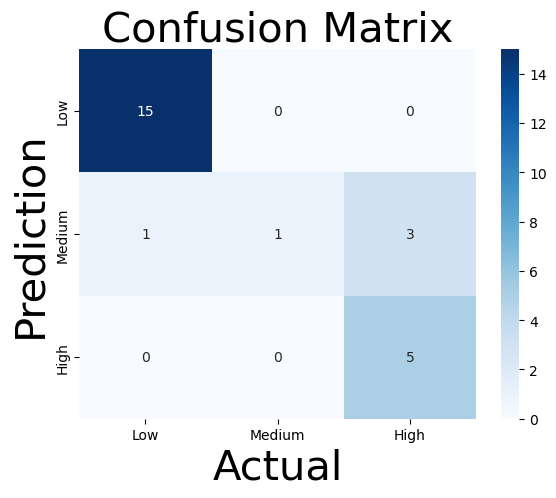

              precision    recall  f1-score   support

         Low       0.94      1.00      0.97        15
      Medium       1.00      0.20      0.33         5
        High       0.62      1.00      0.77         5

    accuracy                           0.84        25
   macro avg       0.85      0.73      0.69        25
weighted avg       0.89      0.84      0.80        25

RandomForestClassifier(class_weight='balanced', max_depth=3,
                       min_samples_split=5, n_estimators=20, random_state=0)


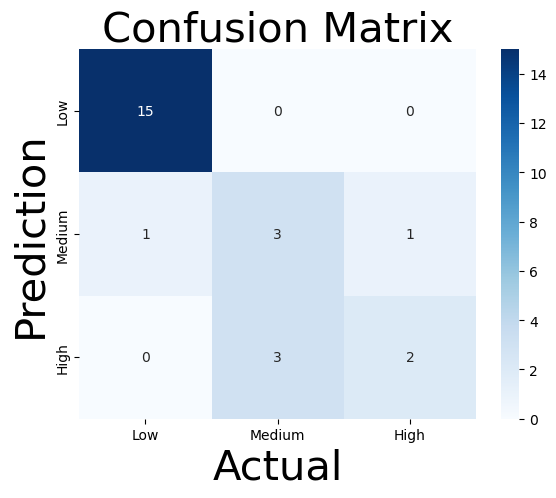

              precision    recall  f1-score   support

         Low       0.94      1.00      0.97        15
      Medium       0.50      0.60      0.55         5
        High       0.67      0.40      0.50         5

    accuracy                           0.80        25
   macro avg       0.70      0.67      0.67        25
weighted avg       0.80      0.80      0.79        25

SVC(C=0.1, gamma=0.1, random_state=0)


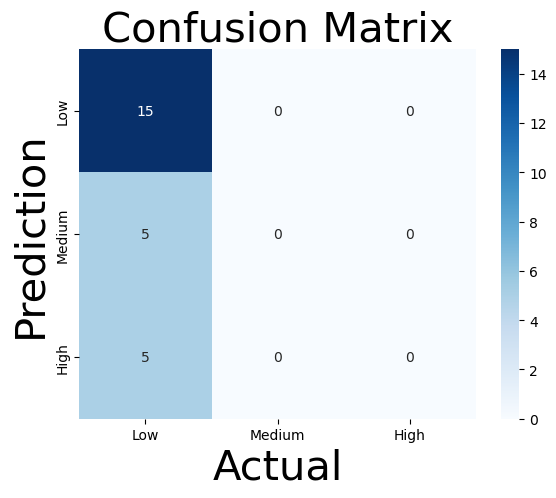

              precision    recall  f1-score   support

         Low       0.60      1.00      0.75        15
      Medium       0.00      0.00      0.00         5
        High       0.00      0.00      0.00         5

    accuracy                           0.60        25
   macro avg       0.20      0.33      0.25        25
weighted avg       0.36      0.60      0.45        25

KNeighborsClassifier(n_neighbors=1)


/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

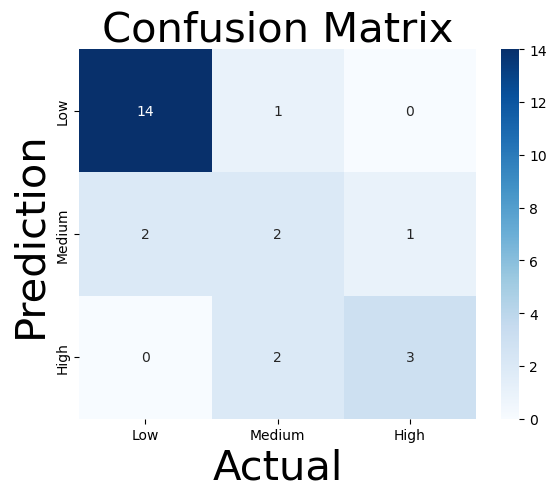

              precision    recall  f1-score   support

         Low       0.88      0.93      0.90        15
      Medium       0.40      0.40      0.40         5
        High       0.75      0.60      0.67         5

    accuracy                           0.76        25
   macro avg       0.67      0.64      0.66        25
weighted avg       0.76      0.76      0.76        25

GaussianNB(var_smoothing=1.0)


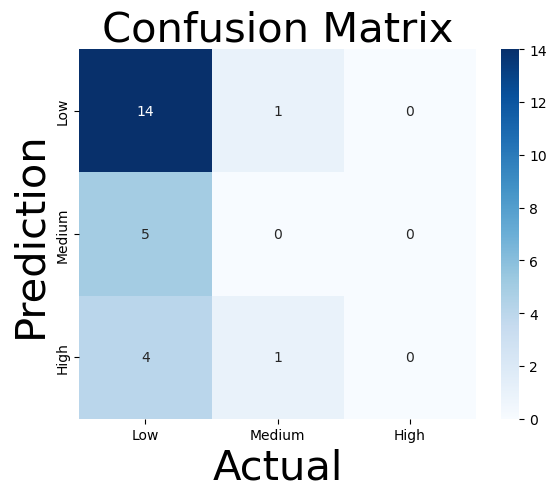

/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dorcas/Forge/mambaforge/envs/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

         Low       0.61      0.93      0.74        15
      Medium       0.00      0.00      0.00         5
        High       0.00      0.00      0.00         5

    accuracy                           0.56        25
   macro avg       0.20      0.31      0.25        25
weighted avg       0.37      0.56      0.44        25

LogisticRegression(C=0.1, class_weight='balanced', random_state=0,
                   solver='liblinear')


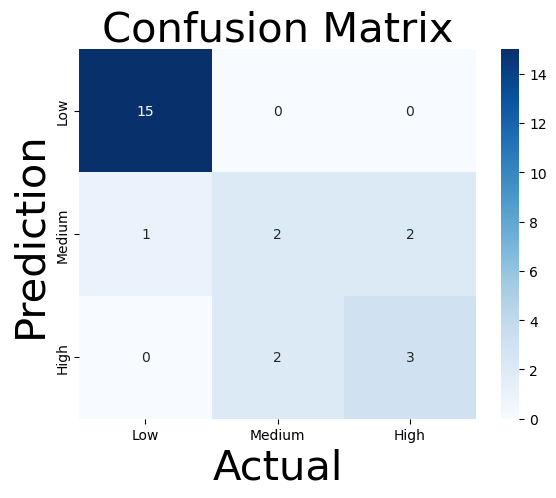

              precision    recall  f1-score   support

         Low       0.94      1.00      0.97        15
      Medium       0.50      0.40      0.44         5
        High       0.60      0.60      0.60         5

    accuracy                           0.80        25
   macro avg       0.68      0.67      0.67        25
weighted avg       0.78      0.80      0.79        25



In [321]:
# cat_cols = ['Died']
# train, valid = folds[0][0], folds[0][1]
# X_valid,y_valid = valid.drop(['Died','EGID'],axis = 1),valid['Died']
# X_train,y_train = train.drop(['Died','EGID'],axis = 1),train['Died']

# Find best hyperparameters
best_hyperparams = []
best_score = []
for model, models_para in zip(models, models_para):    
    gs = train_model(model, models_para, X_train, y_train)
    best_hyperparams += [gs.best_params_]
    best_score += [gs.best_score_]

#models = [DecisionTreeClassifier(),RandomForestClassifier(),svm.SVC(), KNeighborsClassifier(),GaussianNB(),LogisticRegression()]
# Train and evaluate on best hyperparameters
for model, model_para in zip(models, best_hyperparams):
    mod = model
    mod.set_params(**model_para)
    mod.fit(X_train, y_train)
    y_predict = mod.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(model)
    plot_cm(cm)
    print(classification_report(y_test, y_predict, target_names=['Low', 'Medium','High']))


In [111]:
#data_new = data_new.dropna(axis = 0)
d_new = d_new.dropna(axis = 0)

In [55]:
data_new.describe()

,coordinate_latitude,coordinate_longitude,z_accel,odometer,speed,vext,linear_g,road_speed,vgsm,altitude
count,557999.000000,557999.000000,557999.000000,5.579990e+05,557999.000000,557999.000000,557999.000000,557999.000000,557999.000000,557999.000000
mean,-33.895523,18.535094,-0.097475,3.822762e+08,24.817292,14.262484,-0.003205,61.526284,4.382080,43.251689
std,0.292995,0.207036,0.514048,1.579339e+08,23.287239,0.449921,0.067857,12.671990,0.204451,38.750088
min,-34.336422,17.880125,-1.930000,1.335000e+03,0.000000,0.000000,-3.430000,20.000000,3.460000,-50.000000
25%,-34.022171,18.467427,-0.040000,2.403079e+08,9.000000,14.160000,0.000000,60.000000,4.180000,21.000000
50%,-33.985655,18.606771,0.020000,4.523002e+08,18.000000,14.280000,0.000000,60.000000,4.500000,37.000000
75%,-33.935924,18.664091,0.090000,4.707494e+08,38.000000,14.520000,0.030000,60.000000,4.560000,51.000000
max,-32.847308,20.861603,1.940000,6.464146e+08,154.000000,15.240000,2.920000,120.000000,4.600000,3162.000000


In [112]:
#data_new = data_new.reset_index(drop=True)
d_new = d_new.reset_index(drop=True)

Text(0.5, 0, 'Speed with altitude')

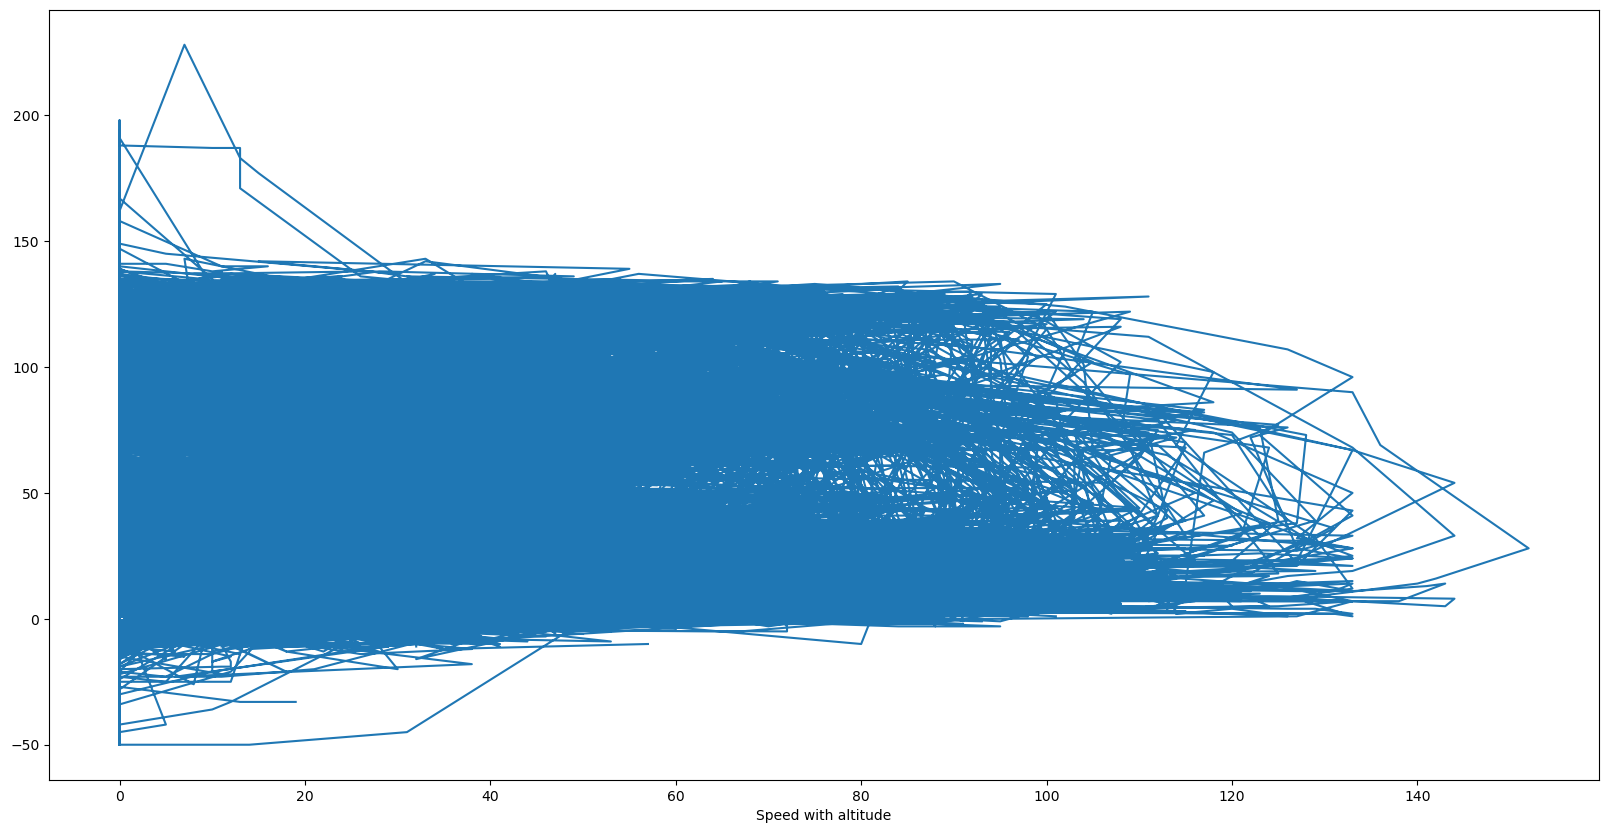

In [101]:
# plt.figure(figsize = (20,10))
# plt.plot(d['speed'],d['altitude'])
# plt.xlabel('Speed with altitude')

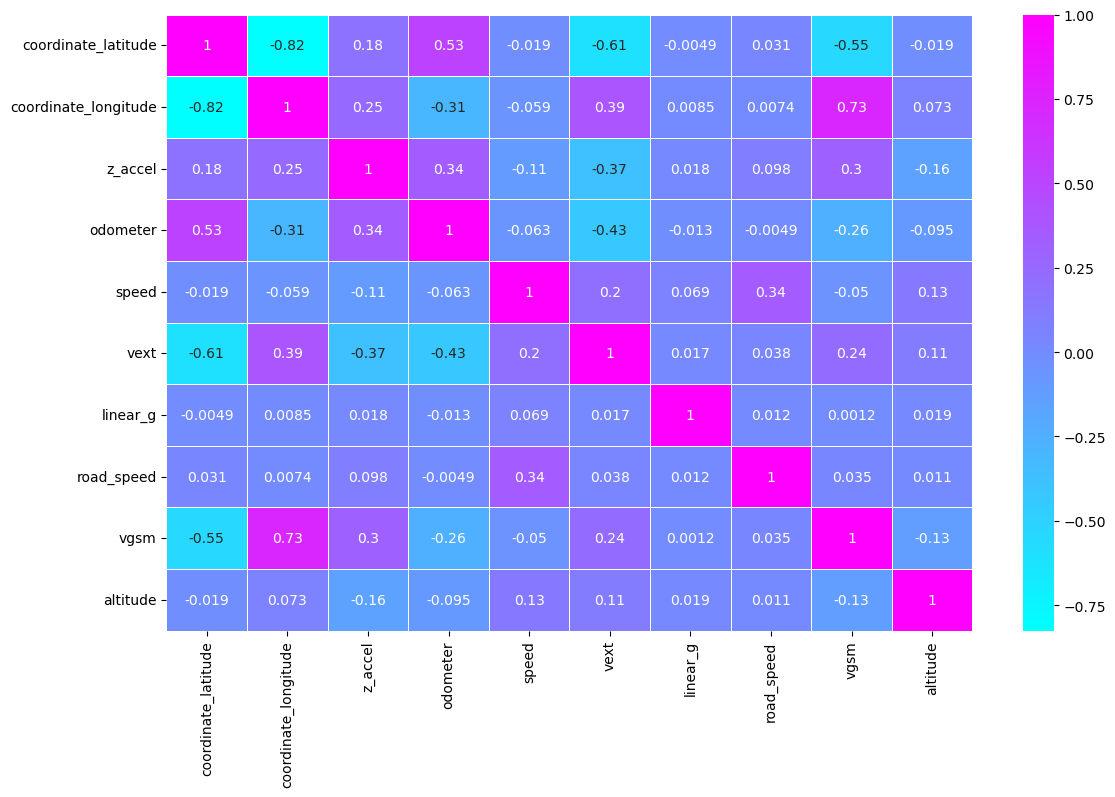

In [21]:
#To identify highly correlated variables
plt.figure(figsize = (13,8))
sns.heatmap(data_new.corr(),annot = True, linewidth=.5, cmap = plt.cm.cool)
plt.show()

In [105]:
def scale(data):
    cols = data.columns.tolist()
    from sklearn.preprocessing import  MinMaxScaler#StandardScaler
    data_ = data.copy()
    data_ = MinMaxScaler().fit_transform(data_)
    data_ = pd.DataFrame(data_, columns=cols)    
    return data_

In [113]:
#data_ = scale(data_new)
d_ = d_new

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_)
data_pca = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [60]:
data_pca

,principal component 1,principal component 2
0,0.816237,0.194311
1,0.797212,0.172743
2,0.797213,0.172739
3,0.797197,0.172727
4,0.796624,0.175007
...,...,...
557994,0.107663,-0.153972
557995,0.107663,-0.153972
557996,0.101568,-0.165334
557997,0.105292,-0.149109


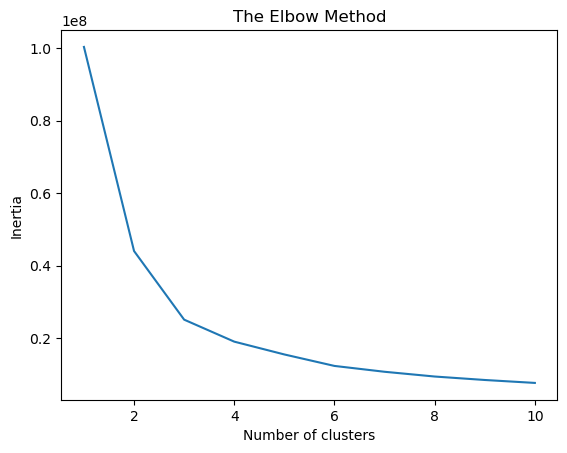

In [117]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(d_)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [65]:
# kmeans = KMeans(n_clusters=6,random_state=0)
# kmeans.fit(data_pca)
# pred = kmeans.predict(data_pca) ##predict the labels of clusters each data point belongs to
# frame = pd.DataFrame(data_pca)
# frame['cluster'] = pred
# frame['cluster'].value_counts()

In [118]:
kmeans = KMeans(n_clusters=4,random_state=0,n_init='auto')
kmeans.fit(d_)
label = kmeans.predict(d_)

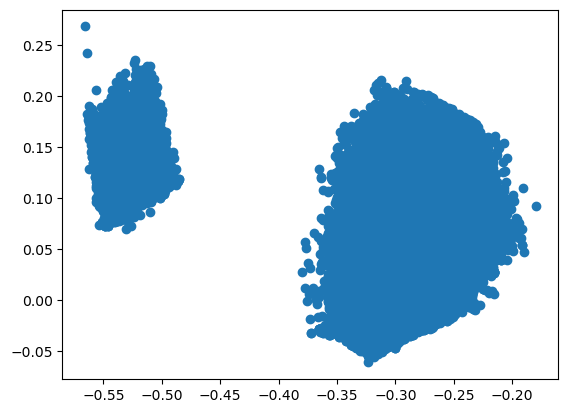

In [88]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = data_pca[label == 0]
 
#plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1])
plt.show()

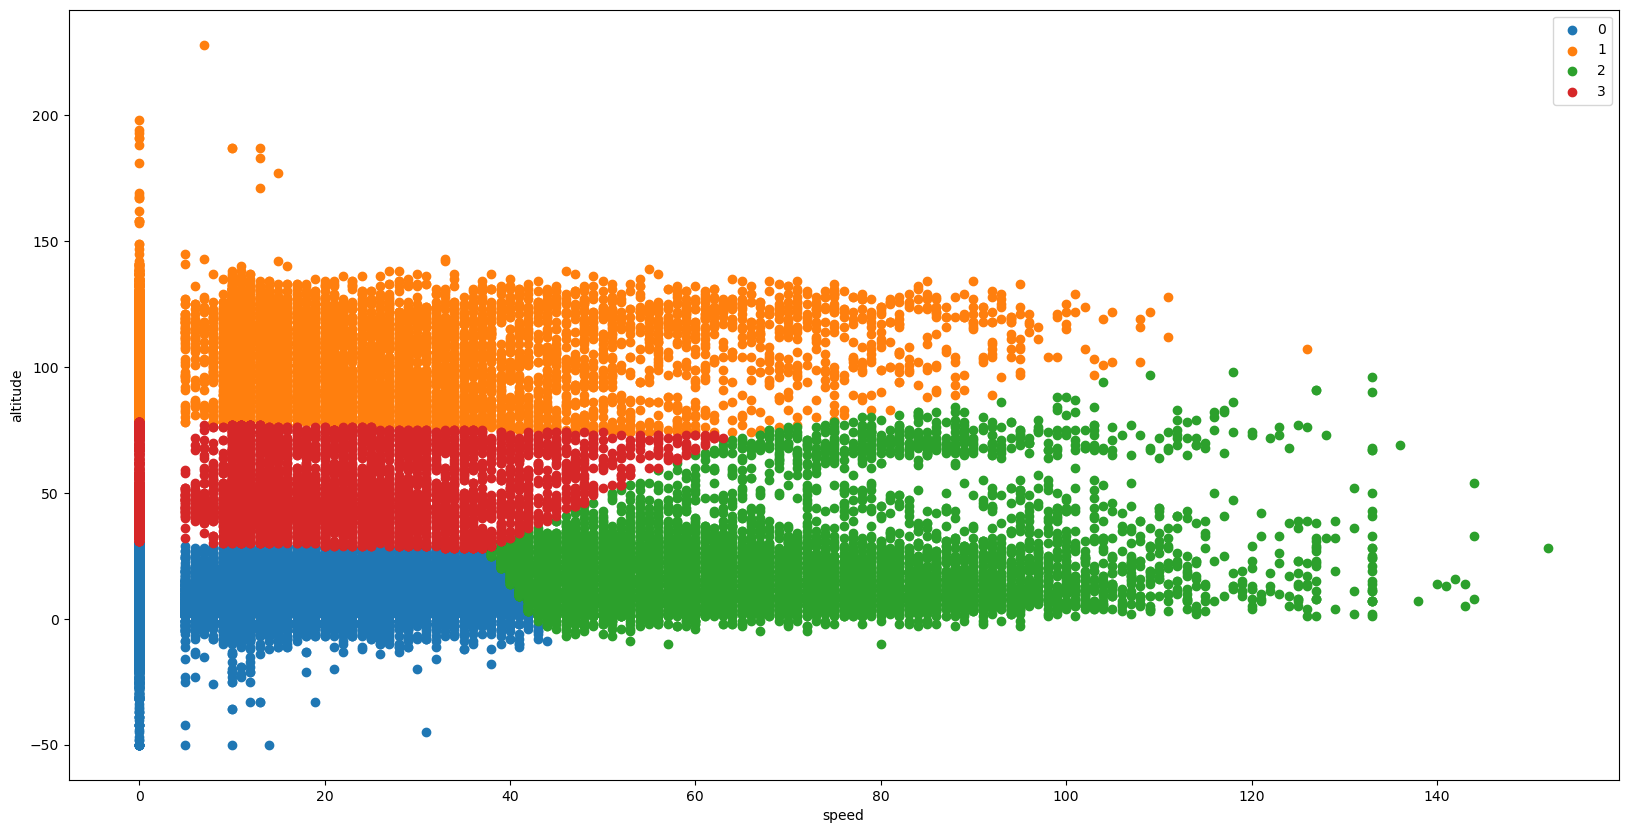

In [119]:
#Getting unique labels 
unique_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize = (20,10))
for i in unique_labels:
    plt.scatter(d_[label == i].iloc[:,0] , d_[label == i].iloc[:,1] , label = i)    
plt.legend()
plt.xlabel('speed')
plt.ylabel('altitude')
plt.show()